## Auto-encodeurs

L'objectif de ce TP est de manipuler des auto-encodeurs sur un exemple simple : la base de données MNIST. L'idée est de pouvoir visualiser les concepts vus en cours, et notamment d'illustrer la notion d'espace latent.

Les images de la base de données MNIST sont des imagettes en niveaux de gris, de taille 28x28 pixels, représentant des chiffres manuscrits de 0 à 9.

![mnist](http://i.ytimg.com/vi/0QI3xgXuB-Q/hqdefault.jpg)




Pour démarrer, nous vous fournissons un code permettant de créer un premier auto-encodeur simple, de charger les données MNIST  et d'entraîner cet auto-encodeur. **L'autoencodeur n'est pas convolutif !** (libre à vous de le transformer pour qu'il le soit, plus tard dans le TP)

L'auto-encodeur implémenté ci-dessous compte 2 couches pour l'encodeur et deux couches pour le décodeur.


<img src="https://drive.google.com/uc?id=16OQjf9cX3dBS8brwxTe7kKed51spclLC" width=400>



On définit 3 modèles : l'encodeur, le décodeur, et l'auto-encodeur qui consiste en une concaténation des deux précédents.

On optimisera le modèle en minimisant l'erreur de reconstruction, ce que l'on fait classiquement en utilisant une erreur quadratique moyenne comme fonction de coût.

In [78]:
from keras.layers import Input, Dense
from keras.models import Model

# Dimension de l'entrée
input_img = Input(shape=(784,))
# Dimension de l'espace latent : PARAMETRE A TESTER !!
latent_dim = 8

# Définition d'un encodeur
x = Dense(2048, activation='relu')(input_img)
encoded = Dense(latent_dim, activation='linear')(x)

# Définition d'un decodeur
decoder_input = Input(shape=(latent_dim,))
x = Dense(2048, activation='relu')(decoder_input)
decoded = Dense(784, activation='sigmoid')(x)

# Construction d'un modèle séparé pour pouvoir accéder aux décodeur et encodeur
encoder = Model(input_img, encoded)
decoder = Model(decoder_input, decoded)

# Construction du modèle de l'auto-encodeur
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)

# Utilisation de l'erreur quadratique moyenne comme fonction de coût
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()
print(encoder.summary())
print(decoder.summary())

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_36 (Functional)      │ (None, 8)              │     1,624,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_37 (Functional)      │ (None, 784)            │     1,624,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248,920 (12.39 MB)

 Trainable params: 3,248,920 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 8)              │        16,392 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,072 (6.20 MB)

 Trainable params: 1,624,072 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 2048)           │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 784)            │     1,606,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,848 (6.20 MB)

 Trainable params: 1,624,848 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [79]:
from keras.datasets import mnist
import numpy as np

# Chargement et normalisation (entre 0 et 1) des données de la base de données MNIST
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Vectorisation des images d'entrée en vecteurs de dimension 784
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

In [80]:
# Entraînement de l'auto-encodeur. On utilise ici les données de test
# pour surveiller l'évolution de l'erreur de reconstruction sur des données
# non utilisées pendant l'entraînement et ainsi détecter le sur-apprentissage.
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2151 - val_loss: 0.1280
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1266 - val_loss: 0.1202
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1195 - val_loss: 0.1163
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1162 - val_loss: 0.1141
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1139 - val_loss: 0.1125
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1121 - val_loss: 0.1115
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1106 - val_loss: 0.1106
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1098 - val_loss: 0.1098
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1088 - val_loss: 0.1094
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1079 - val_loss: 0.1089
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1074 - val_loss: 0.1085
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Le code suivant affiche des exemples d'images de la base de test (1e ligne) et de leur reconstruction (2e ligne).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.017793598


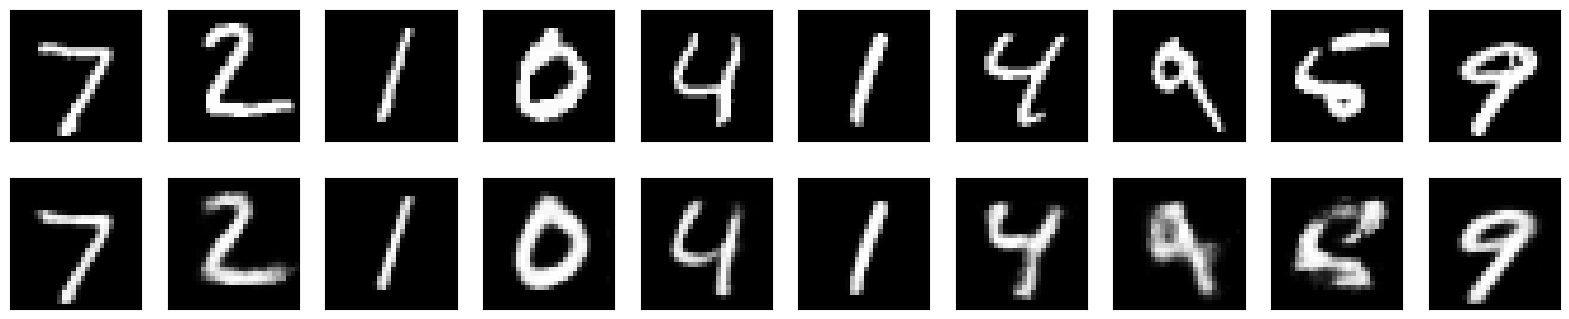

In [81]:
import matplotlib.pyplot as plt

# Prédiction des données de test
decoded_imgs = autoencoder.predict(x_test)

err = 0

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Affichage de l'image originale
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Affichage de l'image reconstruite par l'auto-encodeur
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Erreur de reconstruction
    err += sum( (decoded_imgs[i] - x_test[i])**2 )
err /= (n*28*28)
print(err)
plt.show()

# Travail à faire

1.   Pour commencer, observez les résultats obtenus avec le code fourni. Les résultats semblent imparfaits, les images reconstruites sont bruitées. Modifiez le code fourni pour transformer le problème de régression en classification binaire. Les résultats devraient être bien meilleurs ! Conservez cette formulation (même si elle est non standard) pour la suite.
2.   Avec la dimension d'espace latent qui vous est fournie, on observe une (relativement) faible erreur de reconstruction. Tracez une **courbe** (avec seulement quelques points) qui montre l'évolution de l'**erreur de reconstruction en fonction de la dimension de l'espace latent**. Quelle semble être la dimension minimale de l'espace latent qui permet encore d'observer une reconstruction raisonnable des données (avec le réseau qui vous est fourni) ?
3.   Pour diminuer encore plus la dimension de l'espace latent, il est nécessaire d'augmenter la capacité des réseaux encodeur et décodeur. Cherchez à nouveau la dimension minimale de l'espace latent qui permet d'observer une bonne reconstruction des données, mais en augmentant à l'envi la capacité de votre auto-encodeur.
4.   Écrivez une fonction qui, étant donné deux images de votre espace de test $I_1$ et $I_2$, réalise l'interpolation (avec, par exemple, 10 étapes) entre la représentation latente ($z_1 = $encoder($I_1$) et $z_2 = $encoder($I_2$)) de ces deux données, et génère les images $I_i$ correspondant aux représentations latentes intermédiaires $z_i$. En pseudo python, cela donne :

```python
for i in range(10):
  z_i = z1 + i*(z2-z1)/10
  I_i = decoder(z_i)
```
Testez cette fonction avec un auto-encodeur avec une faible erreur de reconstruction, sur deux données présentant le même chiffre écrit différemment, puis deux chiffres différents.

Vous devriez obtenir un résultat de ce type :    

<img src="https://drive.google.com/uc?id=1GATz2XrXOpnW-S7SzH-kvPzqNIHbaaiB">

5.   Pour finir, le code qui vous est fourni dans la suite permet de télécharger et de préparer une [base de données de visages](http://vis-www.cs.umass.edu/lfw/). ATTENTION : ici les images sont de taille $32\times32$, en couleur, et comportent donc 3 canaux (contrairement aux images de MNIST, qui n'en comptent qu'un). Par analogie avec la question précédente, on pourrait grâce à la représentation latente apprise par un auto-encodeur, réaliser un morphing entre deux visages. Essayez d'abord d'entraîner un auto-encodeur à obtenir une erreur de reconstruction faible. Qu'observe-t-on ?



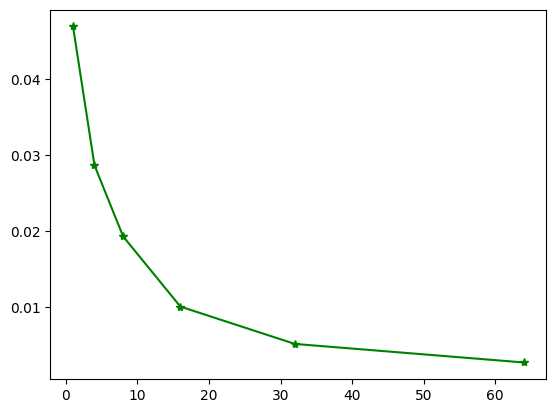

In [59]:
# Dimensions
dims = [1, 4, 8, 16, 32, 64]

# Erreurs
errs = [0.046946943, 0.028648116, 0.019284744, 0.010038703, 0.005118605, 0.002675022]
errs_256 = [0, 0, 0.019808361, 0.009281542, 0, 0]
errs_1024 = [0, 0, 0.016087733, 0, 0, 0]

plt.plot(dims, errs, 'g*-')

In [25]:
a = np.array([2,3])
print(np.shape(a))
print(np.sum(a))

(2,)
5











































# Visages

In [66]:
import pandas as pd
import tarfile, tqdm, cv2, os
from sklearn.model_selection import train_test_split
import numpy as np

# Télécharger les données de la base de données "Labelled Faces in the Wild"
!wget https://acarlier.fr/tp/lfw_attributes.txt
!wget https://acarlier.fr/tp/lfw-deepfunneled.tgz
!wget https://acarlier.fr/tp/lfw.tgz

ATTRS_NAME = "lfw_attributes.txt"
IMAGES_NAME = "lfw-deepfunneled.tgz"
RAW_IMAGES_NAME = "lfw.tgz"

def decode_image_from_raw_bytes(raw_bytes):
    img = cv2.imdecode(np.asarray(bytearray(raw_bytes), dtype=np.uint8), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def load_lfw_dataset(
        use_raw=False,
        dx=80, dy=80,
        dimx=45, dimy=45):

    # Read attrs
    df_attrs = pd.read_csv(ATTRS_NAME, sep='\t', skiprows=1)
    df_attrs = pd.DataFrame(df_attrs.iloc[:, :-1].values, columns=df_attrs.columns[1:])
    imgs_with_attrs = set(map(tuple, df_attrs[["person", "imagenum"]].values))

    # Read photos
    all_photos = []
    photo_ids = []

    # tqdm in used to show progress bar while reading the data in a notebook here, you can change
    # tqdm_notebook to use it outside a notebook
    with tarfile.open(RAW_IMAGES_NAME if use_raw else IMAGES_NAME) as f:
        for m in tqdm.tqdm_notebook(f.getmembers()):
            # Only process image files from the compressed data
            if m.isfile() and m.name.endswith(".jpg"):
                # Prepare image
                img = decode_image_from_raw_bytes(f.extractfile(m).read())

                # Crop only faces and resize it
                img = img[dy:-dy, dx:-dx]
                img = cv2.resize(img, (dimx, dimy))

                # Parse person and append it to the collected data
                fname = os.path.split(m.name)[-1]
                fname_splitted = fname[:-4].replace('_', ' ').split()
                person_id = ' '.join(fname_splitted[:-1])
                photo_number = int(fname_splitted[-1])
                if (person_id, photo_number) in imgs_with_attrs:
                    all_photos.append(img)
                    photo_ids.append({'person': person_id, 'imagenum': photo_number})

    photo_ids = pd.DataFrame(photo_ids)
    all_photos = np.stack(all_photos).astype('uint8')

    # Preserve photo_ids order!
    all_attrs = photo_ids.merge(df_attrs, on=('person', 'imagenum')).drop(["person", "imagenum"], axis=1)

    return all_photos, all_attrs

# Prépare le dataset et le charge dans la variable X
X, attr = load_lfw_dataset(use_raw=True, dimx=32, dimy=32)
# Normalise les images
X = X/255
# Sépare les images en données d'entraînement et de test
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

--2025-09-22 15:39:56--  https://acarlier.fr/tp/lfw_attributes.txt
Resolving acarlier.fr (acarlier.fr)... 212.194.248.69, 2a02:8424:80a2:c01:5edf:fb8c:21fa:ba98
Connecting to acarlier.fr (acarlier.fr)|212.194.248.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14879205 (14M) [text/plain]
Saving to: ‘lfw_attributes.txt’

lfw_attributes.txt  100%[===================>]  14.19M  10.9MB/s    in 1.3s    

2025-09-22 15:39:58 (10.9 MB/s) - ‘lfw_attributes.txt’ saved [14879205/14879205]

--2025-09-22 15:39:58--  https://acarlier.fr/tp/lfw-deepfunneled.tgz
Resolving acarlier.fr (acarlier.fr)... 212.194.248.69, 2a02:8424:80a2:c01:5edf:fb8c:21fa:ba98
Connecting to acarlier.fr (acarlier.fr)|212.194.248.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108770067 (104M) [application/octet-stream]
Saving to: ‘lfw-deepfunneled.tgz’

lfw-deepfunneled.tg 100%[===================>] 103.73M  17.0MB/s    in 7.2s    

2025-09-22 15:40:06 (14.3 MB/s) - 

/tmp/ipython-input-224347882.py:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm.tqdm_notebook(f.getmembers()):


  0%|          | 0/18983 [00:00<?, ?it/s]

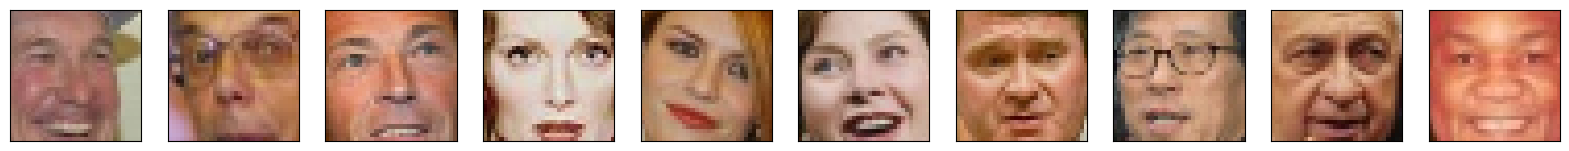

In [67]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):


    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_train[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()